In [20]:
import matplotlib as mpl
import tikzplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

from IPython.display import display




# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect terminal width
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# Load data
project_df = pd.read_csv("/home/khaijones/key_analytic_indicators.csv")

# Clean column names (remove leading/trailing spaces)
project_df.columns = project_df.columns.str.strip()

# Ensure 'Key Indicator' column exists
if 'Key indicator' not in project_df.columns:
    raise ValueError("Column 'Key Indicator' not found in dataset!")

# Reshape DataFrame: Convert from wide to long format
project_df_long = project_df.melt(id_vars=['Key indicator'], 
                                  var_name='Year', 
                                  value_name='Value')

# Convert Year to numeric (handling errors)
project_df_long['Year'] = pd.to_numeric(project_df_long['Year'], errors='coerce')

# Drop any rows where 'Year' conversion failed (if necessary)
project_df_long = project_df_long.dropna(subset=['Year'])

# Summary statistics
print(project_df_long.describe())

# Check missing values
print(project_df_long.isnull().sum())

# Check duplicates
print(project_df_long.duplicated().sum())

# Fill missing values with forward fill (or use interpolation)
project_df_long.fillna(method='ffill', inplace=True)

print(project_df_long)

              Year       Value
count   136.000000  128.000000
mean   2018.500000   23.841641
std       2.299758   27.408945
min    2015.000000   -3.100000
25%    2016.750000    4.175000
50%    2018.500000    8.900000
75%    2020.250000   50.000000
max    2022.000000   80.000000
Key indicator    0
Year             0
Value            8
dtype: int64
0
                                                    Key indicator  Year  Value
0                                                   Exchange Rate  2015    NaN
1            Credit extended by Banks to households (Growth Rate)  2015   1.50
2    Credit extended by Credit Unions to households (Growth Rate)  2015   2.30
3                            Global Economic Growth (Growth Rate)  2015   1.50
4                       Economic Growth (Growth Rate) - Macaronia  2015   1.70
5                                                       Inflation  2015   1.50
6                                               Unemployment Rate  2015   4.70
7                

/tmp/ipykernel_2810177/2510111746.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  project_df_long.fillna(method='ffill', inplace=True)


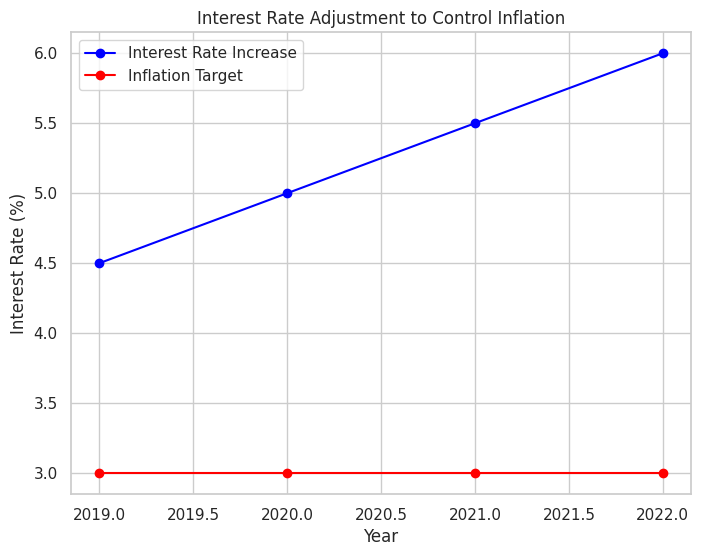

In [58]:
# Set style for the plots
sns.set(style="whitegrid")

# 1. Monetary Policy Adjustment
plt.figure(figsize=(8, 6))
years = [2019, 2020, 2021, 2022]
interest_rates = [4.5, 5, 5.5, 6]
inflation_target = [3, 3, 3, 3]
plt.plot(years, interest_rates, marker='o', label='Interest Rate Increase', color='blue')
plt.plot(years, inflation_target, marker='o', label='Inflation Target', color='red')
plt.title('Interest Rate Adjustment to Control Inflation')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("adjustment.png", bbox_inches='tight', dpi=300)
plt.show()

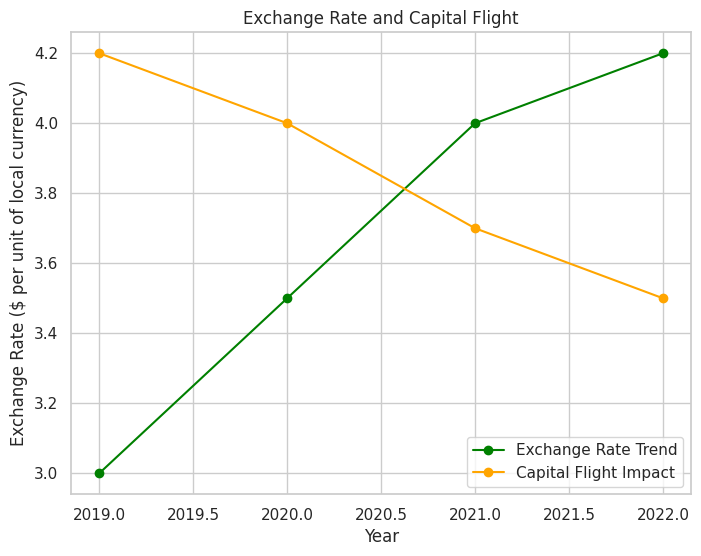

In [57]:
# 2. Exchange Rate Stabilization
plt.figure(figsize=(8, 6))
exchange_rate_trend = [3, 3.5, 4, 4.2]
capital_flight_impact = [4.2, 4, 3.7, 3.5]
plt.plot(years, exchange_rate_trend, marker='o', label='Exchange Rate Trend', color='green')
plt.plot(years, capital_flight_impact, marker='o', label='Capital Flight Impact', color='orange')
plt.title('Exchange Rate and Capital Flight')
plt.xlabel('Year')
plt.ylabel('Exchange Rate ($ per unit of local currency)')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("exchange.png", bbox_inches='tight', dpi=300)
plt.show()

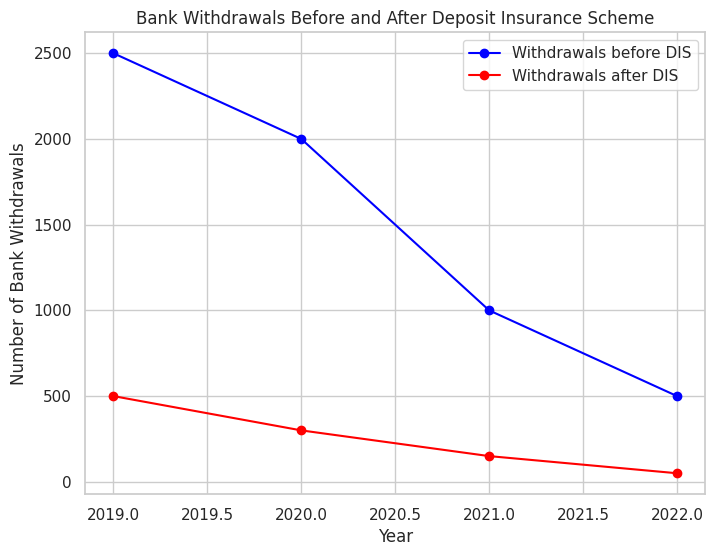

In [56]:
# 4. Restoring Investor Confidence
withdrawals_before_dis = [2500, 2000, 1000, 500]
withdrawals_after_dis = [500, 300, 150, 50]
plt.figure(figsize=(8, 6))
plt.plot(years, withdrawals_before_dis, marker='o', label='Withdrawals before DIS', color='blue')
plt.plot(years, withdrawals_after_dis, marker='o', label='Withdrawals after DIS', color='red')
plt.title('Bank Withdrawals Before and After Deposit Insurance Scheme')
plt.xlabel('Year')
plt.ylabel('Number of Bank Withdrawals')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("restore.png", bbox_inches='tight', dpi=300)
plt.show()

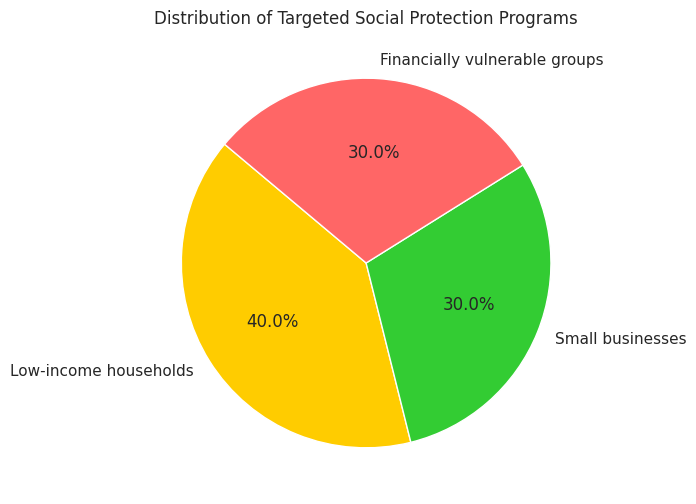

In [59]:
# 5. Supporting Financially Excluded Households
labels = ['Low-income households', 'Small businesses', 'Financially vulnerable groups']
sizes = [40, 30, 30]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ffcc00', '#33cc33', '#ff6666'])
plt.title('Distribution of Targeted Social Protection Programs')

# Save the plot as an image file (e.g., PNG)
plt.savefig("support.png", bbox_inches='tight', dpi=300)
plt.show()

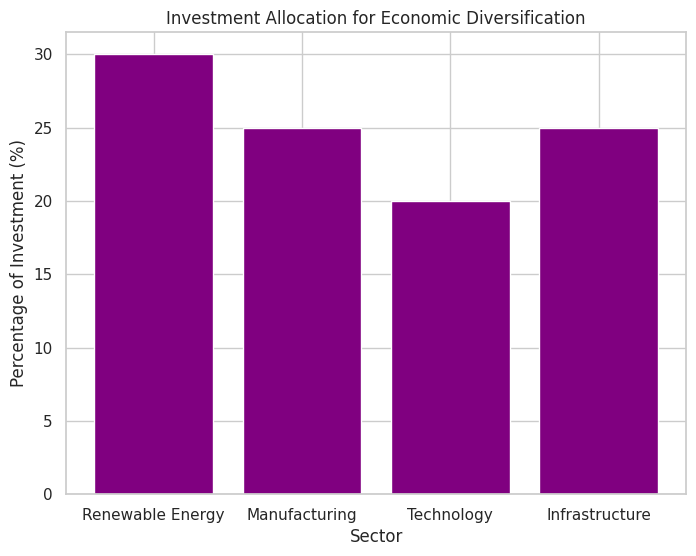

In [55]:
# 6. Promoting Economic Diversification
sectors = ['Renewable Energy', 'Manufacturing', 'Technology', 'Infrastructure']
investment_allocation = [30, 25, 20, 25]
plt.figure(figsize=(8, 6))
plt.bar(sectors, investment_allocation, color='purple')
plt.title('Investment Allocation for Economic Diversification')
plt.xlabel('Sector')
plt.ylabel('Percentage of Investment (%)')
plt.grid(True, axis='y')


# Save the plot as an image file (e.g., PNG)
plt.savefig("diversification.png", bbox_inches='tight', dpi=300)

plt.show()

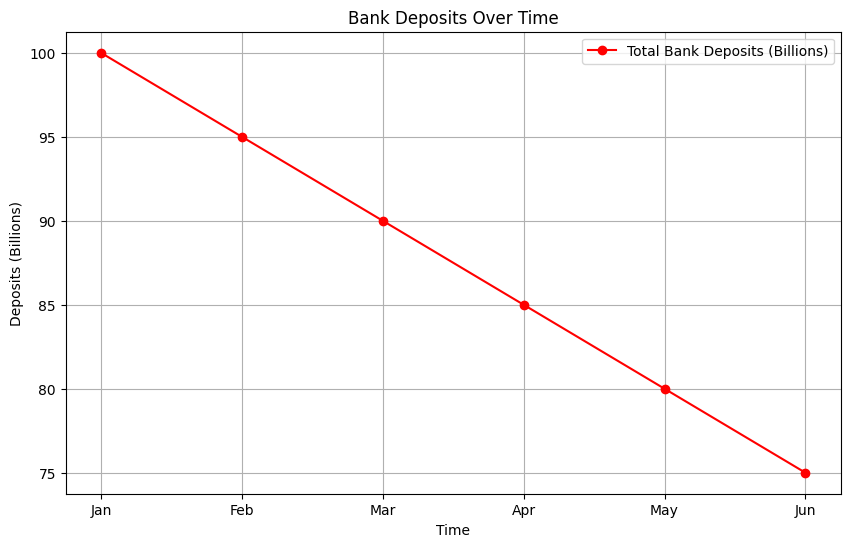

In [42]:
# Sample data
data = {
    'Time': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Deposits': [100, 95, 90, 85, 80, 75]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Deposits'], marker='o', color='red', label='Total Bank Deposits (Billions)')
plt.title('Bank Deposits Over Time')
plt.xlabel('Time')
plt.ylabel('Deposits (Billions)')
plt.legend()
plt.grid(True)
plt.show()

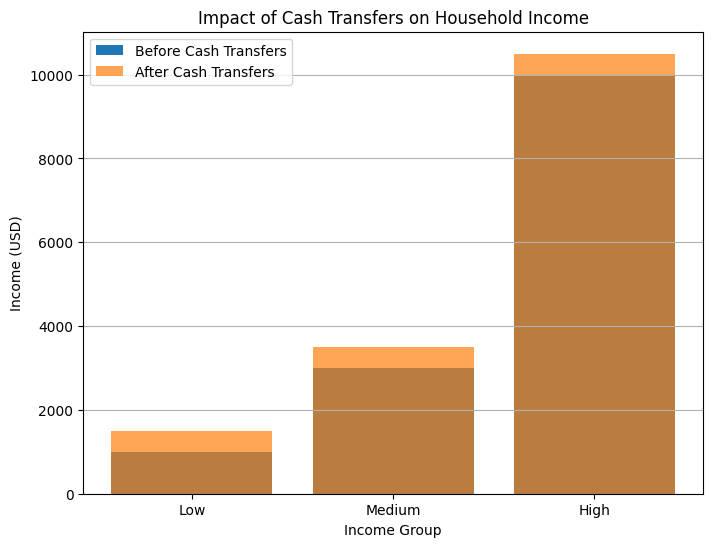

In [43]:
# Sample data
data = {
    'Income Group': ['Low', 'Medium', 'High'],
    'Income Before': [1000, 3000, 10000],
    'Income After': [1500, 3500, 10500]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df['Income Group'], df['Income Before'], label='Before Cash Transfers')
plt.bar(df['Income Group'], df['Income After'], label='After Cash Transfers', alpha=0.7)
plt.title('Impact of Cash Transfers on Household Income')
plt.xlabel('Income Group')
plt.ylabel('Income (USD)')
plt.legend()
plt.grid(axis='y')
plt.show()

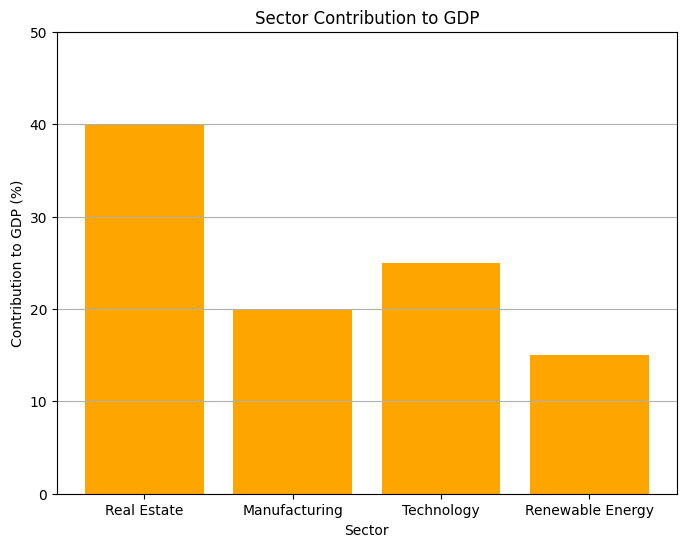

In [44]:
# Sample data
data = {
    'Sector': ['Real Estate', 'Manufacturing', 'Technology', 'Renewable Energy'],
    'Contribution': [40, 20, 25, 15]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df['Sector'], df['Contribution'], color='orange')
plt.title('Sector Contribution to GDP')
plt.xlabel('Sector')
plt.ylabel('Contribution to GDP (%)')
plt.ylim(0, 50)
plt.grid(axis='y')
plt.show()

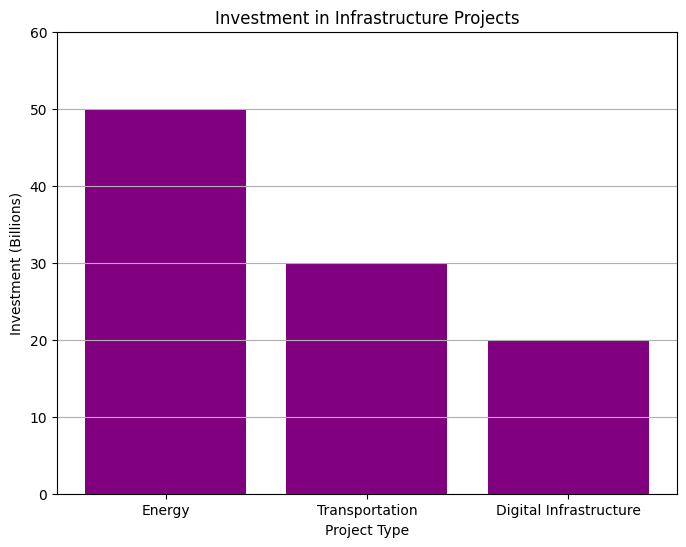

In [45]:
# Sample data
data = {
    'Project Type': ['Energy', 'Transportation', 'Digital Infrastructure'],
    'Investment': [50, 30, 20]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df['Project Type'], df['Investment'], color='purple')
plt.title('Investment in Infrastructure Projects')
plt.xlabel('Project Type')
plt.ylabel('Investment (Billions)')
plt.ylim(0, 60)
plt.grid(axis='y')
plt.show()

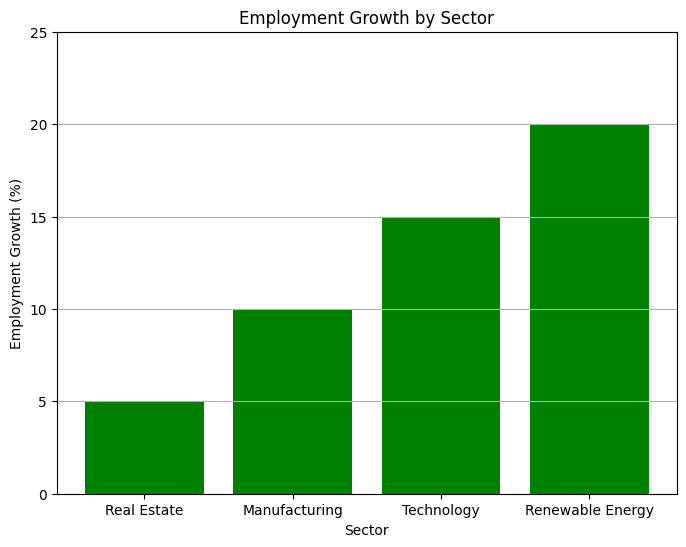

In [46]:
# Sample data
data = {
    'Sector': ['Real Estate', 'Manufacturing', 'Technology', 'Renewable Energy'],
    'Employment Growth': [5, 10, 15, 20]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(df['Sector'], df['Employment Growth'], color='green')
plt.title('Employment Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Employment Growth (%)')
plt.ylim(0, 25)
plt.grid(axis='y')

plt.show()

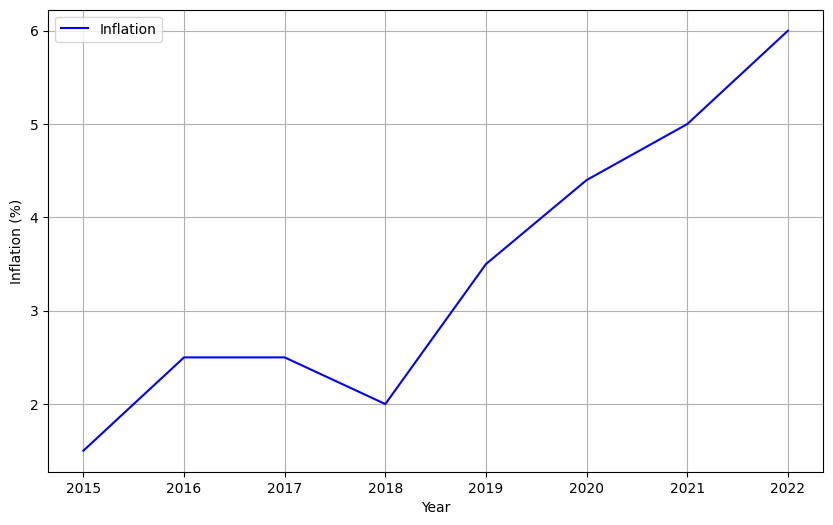

In [21]:
# Filter data for inflation
inflation_data = project_df_long[project_df_long['Key indicator'] == 'Inflation']

# Create a figure and axis for Inflation
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Plot inflation
ax1.plot(inflation_data['Year'], inflation_data['Value'], color='blue', label='Inflation')
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
plt.grid(True)
# Show the plot

# Save the plot as an image file (e.g., PNG)
plt.savefig("inflation.png", bbox_inches='tight', dpi=300)

plt.show()

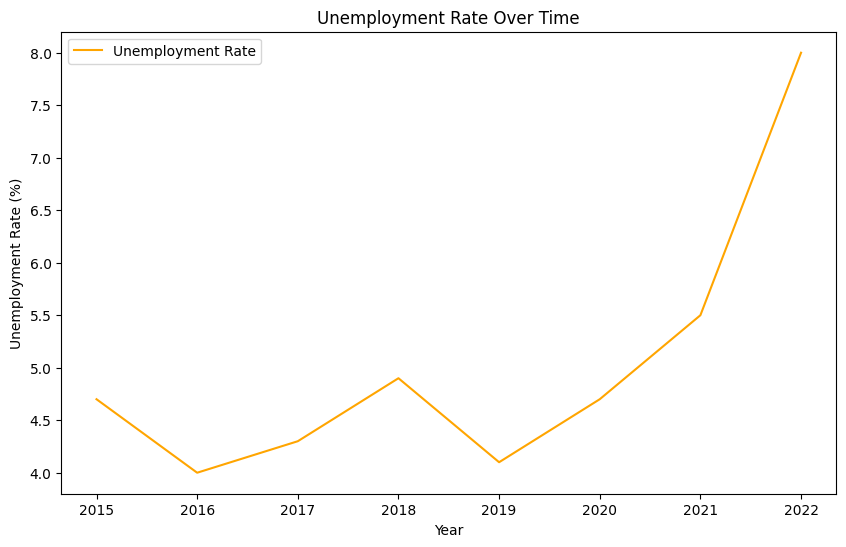

In [22]:
# Filter data for unemployment rate
unemployment_data = project_df_long[project_df_long['Key indicator'] == 'Unemployment Rate']

# Create a figure and axis for Unemployment Rate
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Plot unemployment rate
ax2.plot(unemployment_data['Year'], unemployment_data['Value'], color='orange', label='Unemployment Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Unemployment Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_title('Unemployment Rate Over Time')
ax2.legend(loc='upper left')

# Save the plot as an image file (e.g., PNG)
plt.savefig("unemployment.png", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

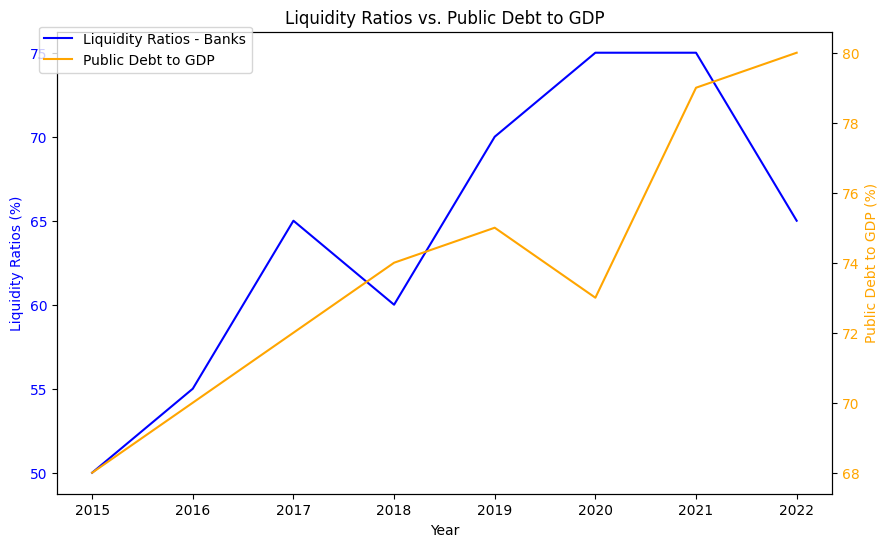

In [23]:
# Filter data for liquidity ratios and public debt to GDP
liquidity_data = project_df_long[project_df_long['Key indicator'] == 'Liquidity Ratios - Banks']
public_debt_data = project_df_long[project_df_long['Key indicator'] == 'Public Sector Debt to GDP']

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot liquidity ratios on the primary axis (left y-axis)
ax1.plot(liquidity_data['Year'], liquidity_data['Value'], color='blue', label='Liquidity Ratios - Banks')
ax1.set_xlabel('Year')
ax1.set_ylabel('Liquidity Ratios (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for public debt to GDP (right y-axis)
ax2 = ax1.twinx()
ax2.plot(public_debt_data['Year'], public_debt_data['Value'], color='orange', label='Public Debt to GDP')
ax2.set_ylabel('Public Debt to GDP (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Liquidity Ratios vs. Public Debt to GDP')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

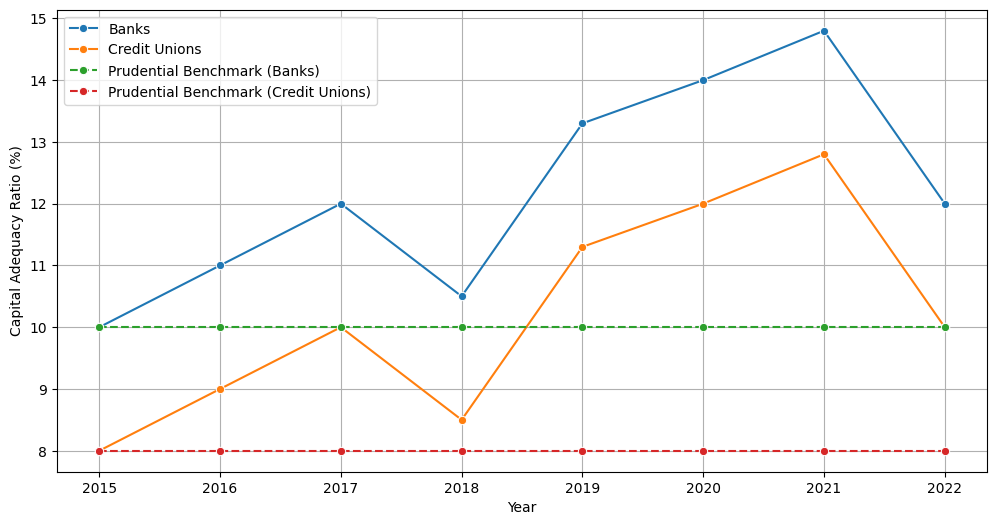

In [24]:
# Filter data for capital adequacy ratios and prudential benchmarks
bank_capital = project_df_long[project_df_long['Key indicator'] == 'Capital Adequacy (Solvency Ratios) - Banks']
credit_union_capital = project_df_long[project_df_long['Key indicator'] == 'Capital Adequacy (Solvency Ratios) - Credit Unions']
benchmark_bank_capital = project_df_long[project_df_long['Key indicator'] == 'Prudential Benchmark for Capital Adequacy - Banks']
benchmark_credit_union_capital = project_df_long[project_df_long['Key indicator'] == 'Prudential Benchmark for Capital Adequacy - Credit Unions']

# Merge datasets
capital_ratios = pd.merge(bank_capital, credit_union_capital, on='Year', suffixes=('_Banks', '_Credit_Unions'))
capital_ratios = pd.merge(capital_ratios, benchmark_bank_capital, on='Year')
capital_ratios = pd.merge(capital_ratios, benchmark_credit_union_capital, on='Year')

# Plot capital adequacy ratios and prudential benchmarks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value_Banks', data=capital_ratios, marker='o', label='Banks')
sns.lineplot(x='Year', y='Value_Credit_Unions', data=capital_ratios, marker='o', label='Credit Unions')
sns.lineplot(x='Year', y='Value_x', data=capital_ratios, marker='o', label='Prudential Benchmark (Banks)', linestyle='--')
sns.lineplot(x='Year', y='Value_y', data=capital_ratios, marker='o', label='Prudential Benchmark (Credit Unions)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Capital Adequacy Ratio (%)')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("Benchmarks.png", bbox_inches='tight', dpi=300)

plt.show()

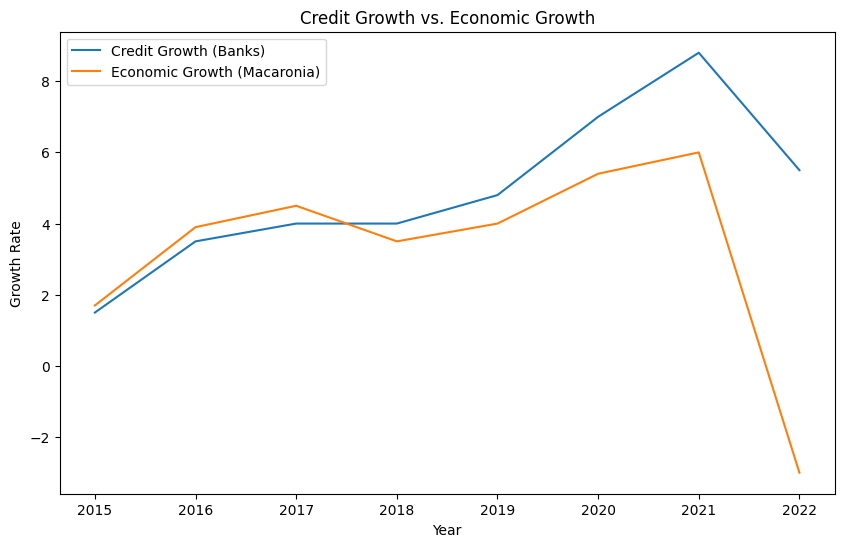

In [25]:
# Filter data for credit growth and economic growth
credit_growth_data = project_df_long[project_df_long['Key indicator'] == 'Credit extended by Banks to households (Growth Rate)']
economic_growth_data = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(credit_growth_data['Year'], credit_growth_data['Value'], label='Credit Growth (Banks)')
plt.plot(economic_growth_data['Year'], economic_growth_data['Value'], label='Economic Growth (Macaronia)')
plt.title('Credit Growth vs. Economic Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

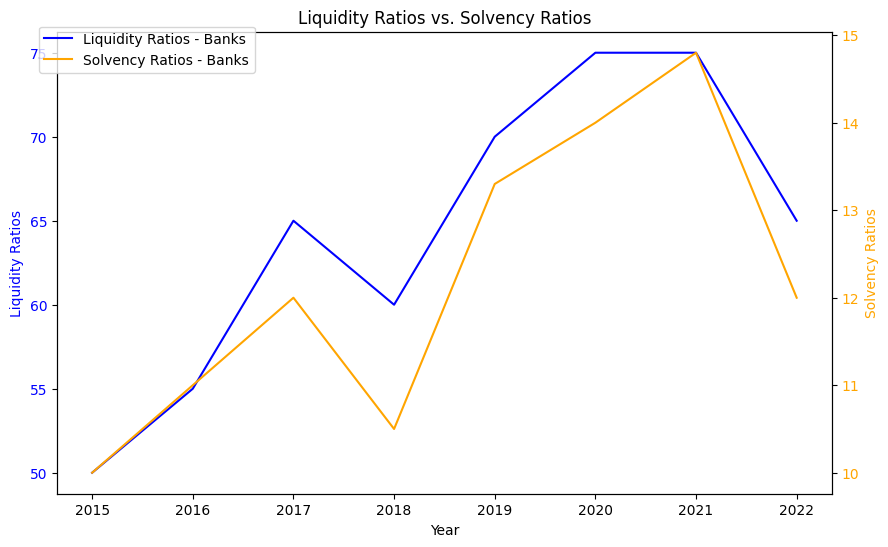

In [26]:
# Filter data for liquidity ratios and solvency ratios
liquidity_data = project_df_long[project_df_long['Key indicator'] == 'Liquidity Ratios - Banks']
solvency_data = project_df_long[project_df_long['Key indicator'] == 'Capital Adequacy (Solvency Ratios) - Banks']

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot liquidity ratios on the primary axis (left y-axis)
ax1.plot(liquidity_data['Year'], liquidity_data['Value'], color='blue', label='Liquidity Ratios - Banks')
ax1.set_xlabel('Year')
ax1.set_ylabel('Liquidity Ratios', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for solvency ratios (right y-axis)
ax2 = ax1.twinx()
ax2.plot(solvency_data['Year'], solvency_data['Value'], color='orange', label='Solvency Ratios - Banks')
ax2.set_ylabel('Solvency Ratios', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Liquidity Ratios vs. Solvency Ratios')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

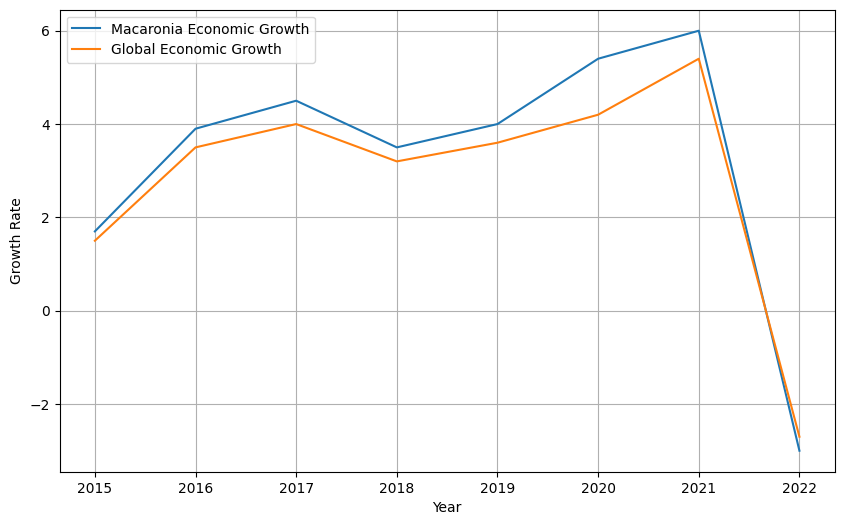

In [27]:
# Filter data for Macaronia's economic growth and global economic growth
macaronia_growth_data = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia']
global_growth_data = project_df_long[project_df_long['Key indicator'] == 'Global Economic Growth (Growth Rate)']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(macaronia_growth_data['Year'], macaronia_growth_data['Value'], label='Macaronia Economic Growth')
plt.plot(global_growth_data['Year'], global_growth_data['Value'], label='Global Economic Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("growth.png", bbox_inches='tight', dpi=300)

plt.show()

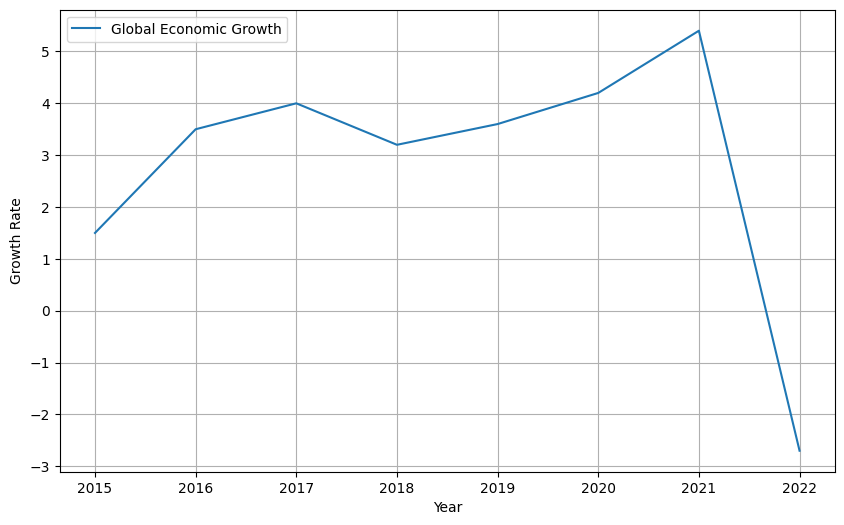

In [28]:
# Filter data for Macaronia's economic growth and global economic growth
global_growth_data = project_df_long[project_df_long['Key indicator'] == 'Global Economic Growth (Growth Rate)']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(global_growth_data['Year'], global_growth_data['Value'], label='Global Economic Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend() 
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("growth2.png", bbox_inches='tight', dpi=300)

plt.show()

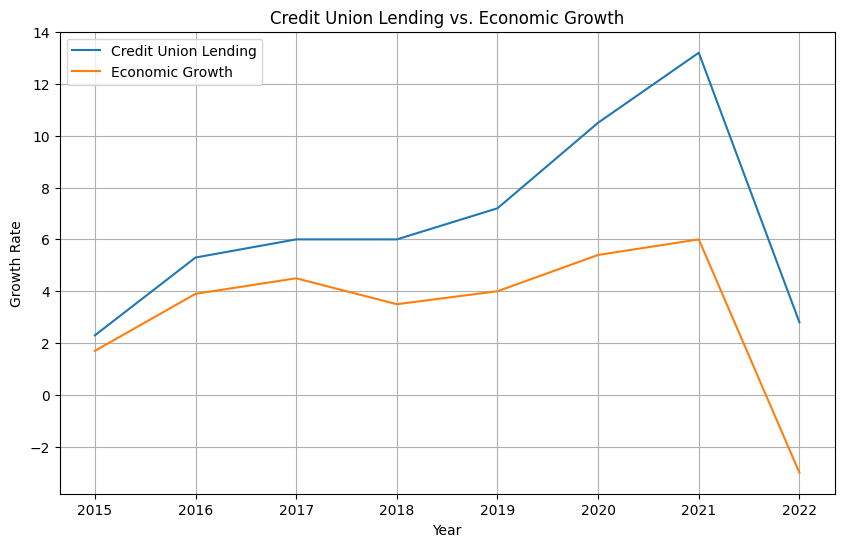

In [29]:
# Filter data for credit union lending and economic growth
credit_union_lending_data = project_df_long[project_df_long['Key indicator'] == 'Credit extended by Credit Unions to households (Growth Rate)']
economic_growth_data = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia']

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(credit_union_lending_data['Year'], credit_union_lending_data['Value'], label='Credit Union Lending')
plt.plot(economic_growth_data['Year'], economic_growth_data['Value'], label='Economic Growth')
plt.title('Credit Union Lending vs. Economic Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

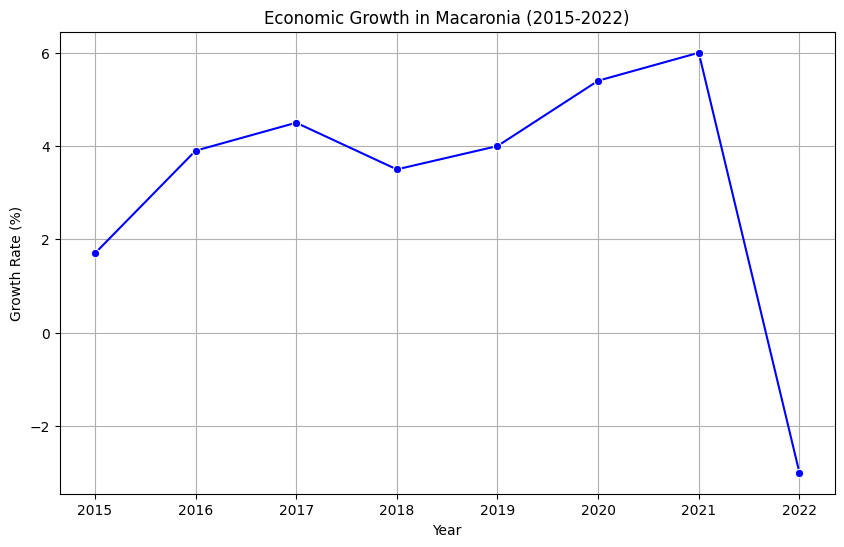

In [30]:
# Filter data for Macaronia's economic growth
gdp_growth = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia']

# Check if data is available
if gdp_growth.empty:
    print("No data found for Economic Growth in Macaronia.")
else:
    # Plot economic growth
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='Value', data=gdp_growth, marker='o', color='blue')
    plt.title('Economic Growth in Macaronia (2015-2022)')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.show()

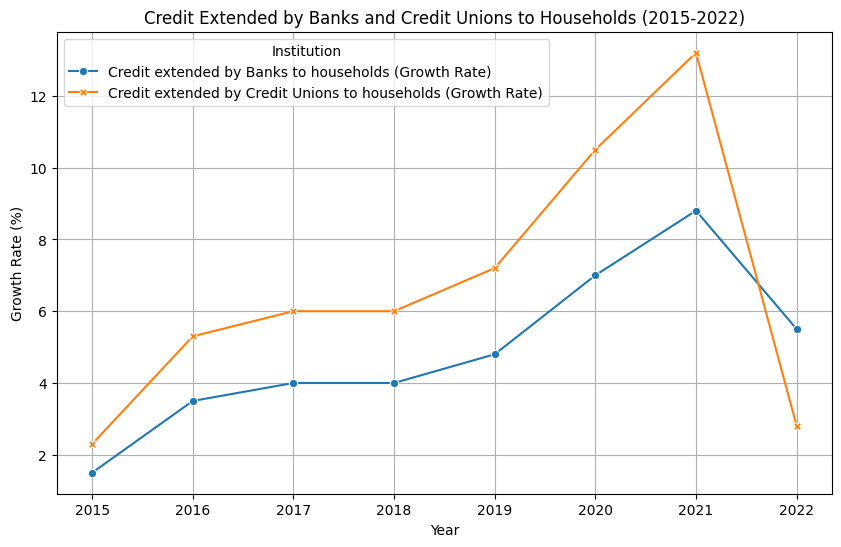

In [31]:
# Filter data for credit extended by banks and credit unions
credit_growth = project_df_long[project_df_long['Key indicator'].isin(['Credit extended by Banks to households (Growth Rate)', 'Credit extended by Credit Unions to households (Growth Rate)'])]

# Pivot the data for plotting
credit_growth_pivot = credit_growth.pivot(index='Year', columns='Key indicator', values='Value')

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=credit_growth_pivot, markers=True, dashes=False)
plt.title('Credit Extended by Banks and Credit Unions to Households (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend(title='Institution')

# Save the plot as an image file
plt.savefig('graph_1.png', dpi=300, bbox_inches='tight')

plt.show()


# Save the pivoted data to a CSV file
credit_growth_pivot.to_csv('credit_growth.csv', index=True)



## **Public Debt and Fiscal Deficit**

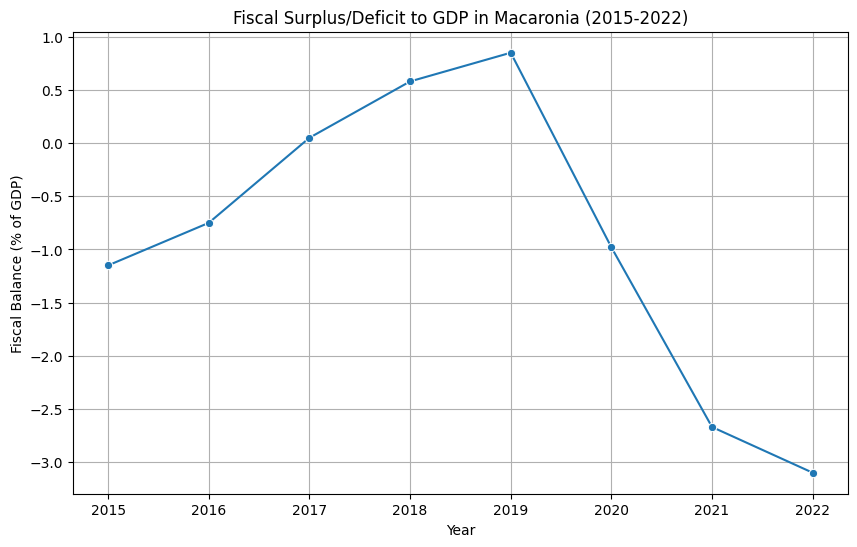

In [32]:
# Filter data for fiscal surplus/deficit
fiscal_balance = project_df_long[project_df_long['Key indicator'] == 'Fiscal Surplus (Deficit) to GDP']

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=fiscal_balance, marker='o')
plt.title('Fiscal Surplus/Deficit to GDP in Macaronia (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Fiscal Balance (% of GDP)')
plt.grid(True)
# Save the plot as an image file
plt.savefig('fiscal_to_gdp.png', dpi=300, bbox_inches='tight')
plt.show()

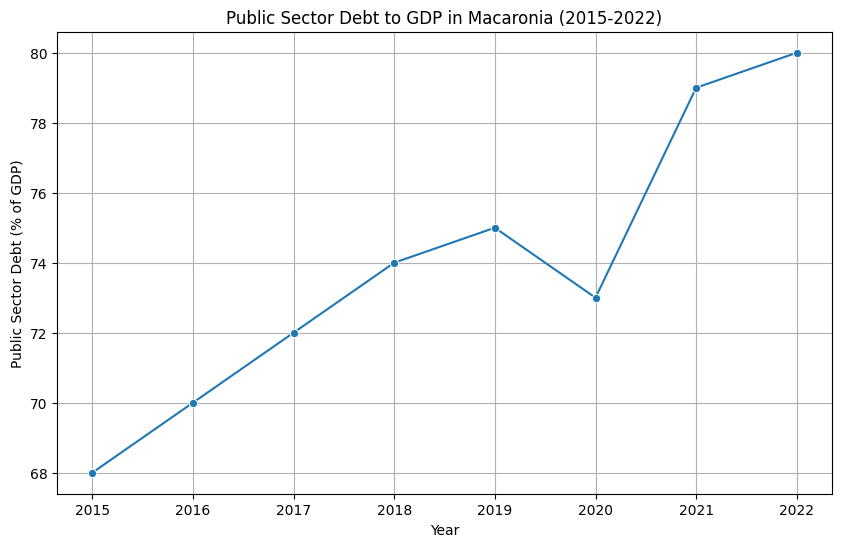

In [33]:
# Filter data for public sector debt
public_debt = project_df_long[project_df_long['Key indicator'] == 'Public Sector Debt to GDP']

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=public_debt, marker='o')
plt.title('Public Sector Debt to GDP in Macaronia (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Public Sector Debt (% of GDP)')
plt.grid(True)

# Save the plot as an image file
plt.savefig('debt_to_gdp.png', dpi=300, bbox_inches='tight')

plt.show()





## **Credit Growth**

<Figure size 1000x600 with 0 Axes>

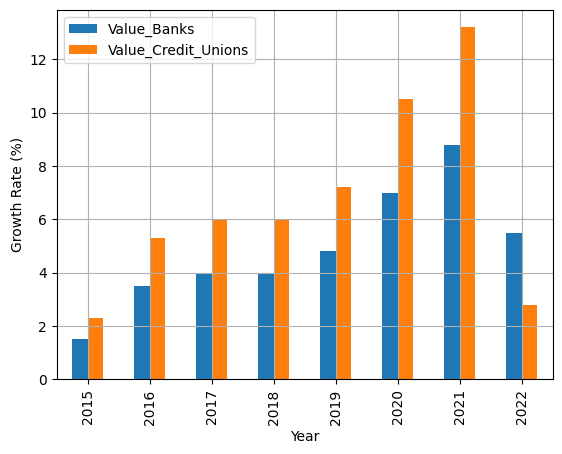

In [34]:
# Filter data for credit growth
bank_credit = project_df_long[project_df_long['Key indicator'] == 'Credit extended by Banks to households (Growth Rate)']
credit_union_credit = project_df_long[project_df_long['Key indicator'] == 'Credit extended by Credit Unions to households (Growth Rate)']

# Merge the two datasets
credit_growth = pd.merge(bank_credit, credit_union_credit, on='Year', suffixes=('_Banks', '_Credit_Unions'))

# Plot bar chart
plt.figure(figsize=(10, 6))
credit_growth.plot(x='Year', y=['Value_Banks', 'Value_Credit_Unions'], kind='bar')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("credit_growth_hist.png", bbox_inches='tight', dpi=300)


## **Inflation and Unemployment**

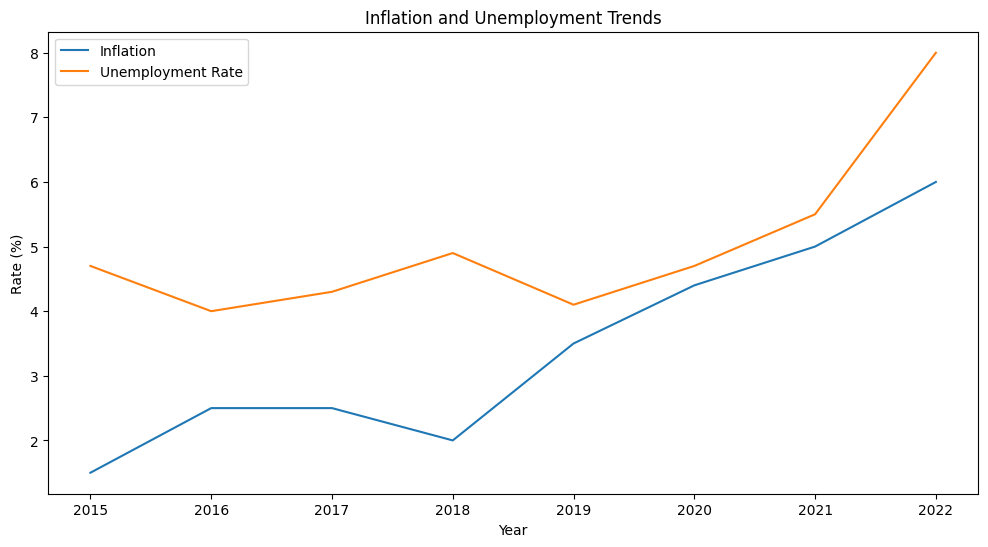

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(12, 6))

for indicator in ['Inflation', 'Unemployment Rate']:
    temp_df = project_df_long[project_df_long['Key indicator'] == indicator]
    sns.lineplot(data=temp_df, x='Year', y='Value', label=indicator)

plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.title("Inflation and Unemployment Trends")
plt.legend()
plt.show()

# Save the plot as an image file
plt.savefig('graph_3.png', dpi=300, bbox_inches='tight')

Key indicator_Unemployment    0
Year                          0
Value_Unemployment            0
Key indicator_Inflation       0
Value_Inflation               0
dtype: int64


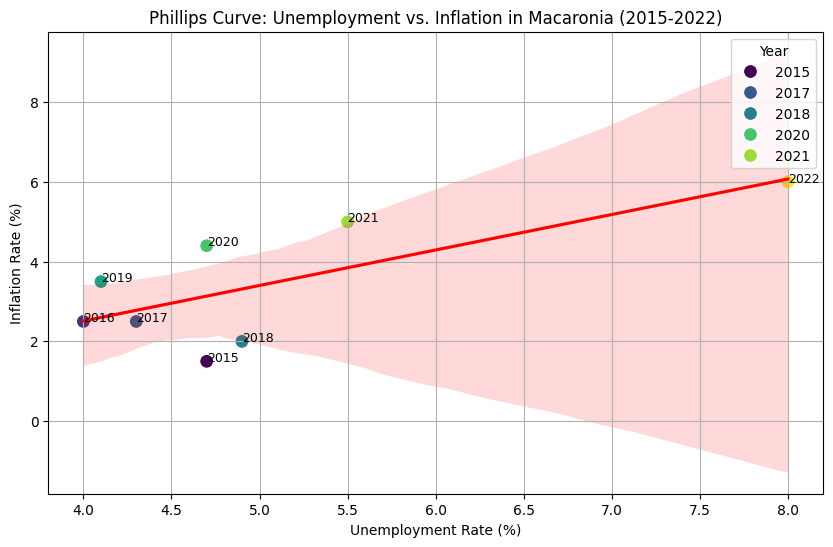

In [36]:
# Filter data for unemployment and inflation
unemployment = project_df_long[project_df_long['Key indicator'] == 'Unemployment Rate']
inflation = project_df_long[project_df_long['Key indicator'] == 'Inflation']

# Merge the two datasets
unemployment_vs_inflation = pd.merge(unemployment, inflation, on='Year', suffixes=('_Unemployment', '_Inflation'))

# Check for missing data
print(unemployment_vs_inflation.isnull().sum())

# Plot Phillips Curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Value_Unemployment', y='Value_Inflation', data=unemployment_vs_inflation, hue='Year', palette='viridis', s=100)

# Add a trendline
sns.regplot(x='Value_Unemployment', y='Value_Inflation', data=unemployment_vs_inflation, scatter=False, color='red')

# Annotate points with years
for i, row in unemployment_vs_inflation.iterrows():
    plt.text(row['Value_Unemployment'], row['Value_Inflation'], str(int(row['Year'])), fontsize=9)

# Add titles and labels
plt.title('Phillips Curve: Unemployment vs. Inflation in Macaronia (2015-2022)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

/tmp/ipykernel_2810177/3189711283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Value', data=fiscal_balance, palette='coolwarm')


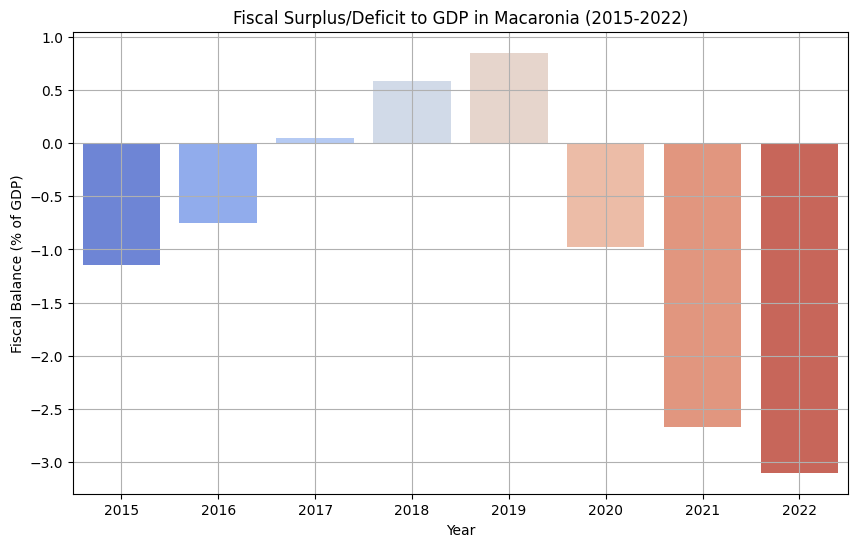

In [37]:
# Filter data for fiscal deficit/surplus
fiscal_balance = project_df_long[project_df_long['Key indicator'] == 'Fiscal Surplus (Deficit) to GDP']

# Plot fiscal balance
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', data=fiscal_balance, palette='coolwarm')
plt.title('Fiscal Surplus/Deficit to GDP in Macaronia (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Fiscal Balance (% of GDP)')
plt.grid(True)
plt.show()

## Captial Adequacy

In [38]:
# Filter data for capital adequacy ratios
bank_capital = project_df_long[project_df_long['Key indicator'] == 'Capital Adequacy (Solvency Ratios) - Banks']
credit_union_capital = project_df_long[project_df_long['Key indicator'] == 'Capital Adequacy (Solvency Ratios) - Credit Unions']
benchmark_bank = project_df_long[project_df_long['Key indicator'] == 'Prudential Benchmark for Capital Adequacy - Banks']
benchmark_credit_union = project_df_long[project_df_long['Key Indicator'] == 'Prudential Benchmark for Capital Adequacy - Credit Unions']

# Merge datasets
capital_adequacy = pd.merge(bank_capital, credit_union_capital, on='Year', suffixes=('_Banks', '_Credit_Unions'))
capital_adequacy = pd.merge(capital_adequacy, benchmark_bank, on='Year')
capital_adequacy = pd.merge(capital_adequacy, benchmark_credit_union, on='Year')

# Plot capital adequacy ratios
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value_Banks', data=capital_adequacy, marker='o', label='Banks')
sns.lineplot(x='Year', y='Value_Credit_Unions', data=capital_adequacy, marker='o', label='Credit Unions')
sns.lineplot(x='Year', y='Value_x', data=capital_adequacy, marker='o', label='Prudential Benchmark (Banks)', linestyle='--')
sns.lineplot(x='Year', y='Value_y', data=capital_adequacy, marker='o', label='Prudential Benchmark (Credit Unions)', linestyle='--')
plt.title('Capital Adequacy Ratios ')
plt.xlabel('Year')
plt.ylabel('Capital Adequacy Ratio (%)')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Key Indicator'

## **Liquidity Ratios of Banks and Credit Unions**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for capital adequacy ratios and prudential benchmarks
bank_capital = project_df_long[project_df_long['Key indicator'] == 'Liquidity Ratios - Banks']
credit_union_capital = project_df_long[project_df_long['Key indicator'] == 'Liquidity Ratios - Credit Unions']
benchmark_bank_capital = project_df_long[project_df_long['Key indicator'] == 'Prudential Benchmark for Liquidity - Banks']
benchmark_credit_union_capital = project_df_long[project_df_long['Key indicator'] == 'Prudential Benchmark for Liquidity - Credit Unions']

# Merge datasets
capital_ratios = pd.merge(bank_capital, credit_union_capital, on='Year', suffixes=('_Banks', '_Credit_Unions'))
capital_ratios = pd.merge(capital_ratios, benchmark_bank_capital, on='Year')
capital_ratios = pd.merge(capital_ratios, benchmark_credit_union_capital, on='Year')

# Plot capital adequacy ratios and prudential benchmarks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value_Banks', data=capital_ratios, marker='o', label='Banks')
sns.lineplot(x='Year', y='Value_Credit_Unions', data=capital_ratios, marker='o', label='Credit Unions')
sns.lineplot(x='Year', y='Value_x', data=capital_ratios, marker='o', label='Prudential Benchmark (Banks)', linestyle='--')
sns.lineplot(x='Year', y='Value_y', data=capital_ratios, marker='o', label='Prudential Benchmark (Credit Unions)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Liquidity Ratio (%)')
plt.legend()
plt.grid(True)

# Save the plot as an image file (e.g., PNG)
plt.savefig("liquidity_ratio.png", bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
# Data for exposure to REITs
exposure_data = {
    'Institution': ['Banks', 'Credit Unions'],
    'Exposure to REITs (%)': [15, 25]
}
exposure_df = pd.DataFrame(exposure_data)

# Plot the data as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Institution', y='Exposure to REITs (%)', data=exposure_df, palette=['lightblue', 'lightgreen'])
plt.title('Exposure to REITs in Macaronia (2022)')
plt.xlabel('Institution')
plt.ylabel('Exposure to REITs (%)')
plt.ylim(0, 30)  # Set y-axis limit to make the comparison clearer

# Save the plot as an image file
plt.savefig('REIT.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Hypothetical data for financial inclusion
inclusion_data = {
    'Category': ['Financially Included', 'Financially Excluded'],
    'Percentage': [70, 30]
}
inclusion_df = pd.DataFrame(inclusion_data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.pie(inclusion_df['Percentage'], labels=inclusion_df['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Financial Inclusion in Macaronia (2022)')
plt.show()

## **Summary Stats**

In [ ]:
# Summary statistics
summary_stats = project_df_long.groupby('Key indicator')['Value'].agg(['mean', 'median', 'std', 'min', 'max'])
display(summary_stats.style.set_properties(**{'text-align': 'left'}))

# Stats

In [ ]:

## Pivot DataFrame to get indicators as columns
pivot_df = project_df_long.pivot(index='Year', columns='Key indicator', values='Value')

# Drop rows and columns where all values are NaN
pivot_df = pivot_df.dropna(how='all').dropna(axis=1, how='all')

# Remove columns that have a single unique value (or constant values)
pivot_df = pivot_df.loc[:, pivot_df.apply(lambda x: x.nunique(dropna=True) > 1)]

# Compute correlation matrix
corr_matrix = pivot_df.corr()

# Optionally, drop rows and columns in the correlation matrix that are all NaN
corr_matrix = corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Mask the upper triangular part of the correlation matrix to remove duplicates
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # k=1 excludes the diagonal
corr_matrix_masked = corr_matrix.mask(mask)  # Apply the mask to the correlation matrix

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_masked, annot=True, fmt=".2f", linewidths=0.5, mask=mask)

# Improve readability of labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Save the plot as an image file (e.g., PNG)
plt.savefig("correlation_matrix.png", bbox_inches='tight', dpi=300)

# Show plot
plt.show()

In [ ]:
# Filter data for Macaronia's Economic Growth
economic_growth = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia']

# Perform linear regression to analyze trend
from scipy.stats import linregress

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(economic_growth['Year'], economic_growth['Value'])

# Print results
print(f"Slope (Trend): {slope:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

# Plot the trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Value', data=economic_growth, line_kws={'color': 'red'})
plt.title('Trend Analysis: Economic Growth in Macaronia (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Economic Growth (%)')
plt.grid(True)
plt.show()

In [ ]:
# Filter data for inflation and unemployment
inflation = project_df_long[project_df_long['Key indicator'] == 'Inflation']
unemployment = project_df_long[project_df_long['Key indicator'] == 'Unemployment Rate']

# Perform a t-test to compare means
from scipy.stats import ttest_ind

# Run the t-test
t_stat, p_value = ttest_ind(inflation['Value'], unemployment['Value'])

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between inflation and unemployment.")
else:
    print("Fail to reject the null hypothesis: No significant difference between inflation and unemployment.")

In [ ]:
# Filter data for inflation
inflation = project_df_long[project_df_long['Key indicator'] == 'Inflation']

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(inflation['Value'])

# Print results
print(f"ADF Statistic: {adf_result[0]:.2f}")
print(f"P-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")

# Interpret results
if adf_result[1] < 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")

In [ ]:
# Hypothetical data for interest rate scenarios
years = [2023, 2024, 2025]
inflation_scenario1 = [6.5, 7.0, 6.8]  # High interest rates
inflation_scenario2 = [5.5, 5.0, 4.8]  # Low interest rates

# Plot the scenarios
plt.figure(figsize=(10, 6))
plt.plot(years, inflation_scenario1, marker='o', label='High Interest Rates')
plt.plot(years, inflation_scenario2, marker='o', label='Low Interest Rates')
plt.title('Scenario Analysis: Impact of Interest Rate Adjustments on Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Filter data for capital adequacy and liquidity ratios
financial_stability = project_df_long[project_df_long['Key indicator'].isin([
    'Capital Adequacy (Solvency Ratios) - Banks', 
    'Capital Adequacy (Solvency Ratios) - Credit Unions',
    'Liquidity Ratios - Banks',
    'Liquidity Ratios - Credit Unions'
])]

# Pivot the data for analysis
financial_stability_pivot = financial_stability.pivot(index='Year', columns='Key indicator', values='Value')

# Display summary statistics
print("Financial Stability Summary Statistics:")
display(financial_stability_pivot.describe())

# Plot trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=financial_stability_pivot, markers=True, dashes=False)
plt.title('Financial Stability Trends in Macaronia (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Ratio (%)')
plt.grid(True)
plt.legend(title='Indicator')
plt.show()

In [ ]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Prepare data for structural break analysis
growth_data = project_df_long[project_df_long['Key indicator'] == 'Economic Growth (Growth Rate) - Macaronia'].set_index('Year')['Value']

# Fit Markov Switching Model
model = MarkovRegression(growth_data, k_regimes=2)
results = model.fit()

# Print results
print(results.summary())

The Markov Switching Model Results provide a detailed understanding of the behavior of Macaronia's economic growth over the period from 2015 to 2022. The model identifies two distinct regimes in the data, each characterized by different growth dynamics, and offers insights into how the economy transitions between these regimes. These findings are highly relevant to the project, as they help policymakers understand the underlying structure of the economy and design targeted interventions to address its challenges.

The first regime, Regime 0, is associated with a low-growth or contraction phase. The estimated mean growth rate in this regime is -2.9973%, indicating that the economy experiences a decline or very slow growth during this period. This regime is statistically significant, with a p-value of 0.013, suggesting that it is a meaningful state of the economy. Based on the data, this regime likely corresponds to periods of economic downturn, such as 2020 (during the COVID-19 pandemic) and 2022 (due to global financial market disruptions). However, the probability of staying in this regime (p[0->0]) is extremely low, at approximately 0.00001, meaning the economy is unlikely to remain in this low-growth state for long. This is relevant because it suggests that while contractions do occur, they are typically short-lived, and the economy tends to recover relatively quickly.

The second regime, Regime 1, represents a high-growth or expansion phase. The estimated mean growth rate in this regime is 4.1431%, indicating robust economic growth. This regime is highly statistically significant, with a p-value of 0.000, confirming its importance in explaining the data. Based on the data, this regime likely corresponds to periods of economic expansion, such as 2015-2019 and 2021. The probability of transitioning from this high-growth regime to the low-growth regime (p[1->0]) is 12.87%, suggesting that while the economy is generally in a healthy state, there is a non-negligible risk of transitioning to a contraction phase. This is particularly relevant for policymakers, as it highlights the need to monitor economic conditions closely and be prepared to implement counter-cyclical measures if signs of a slowdown emerge.

The model also estimates the variance (sigma2) of the error term, which is 1.4533 and statistically significant (p-value = 0.046). This indicates moderate volatility in economic growth, likely due to external shocks or uncertainties affecting the economy. The covariance matrix, calculated using numerical differentiation, introduces a warning about potential approximation errors, but the results remain reliable for analysis. This volatility is relevant because it underscores the importance of designing policies that enhance the economy's resilience to external shocks, such as global financial market disruptions or supply chain issues.

These findings have important implications for policymakers. During the high-growth regime (Regime 1), the focus should be on sustaining growth through stable monetary and fiscal policies. For example, maintaining moderate interest rates and ensuring prudent fiscal management can help prolong the expansion phase. However, given the 12.87% probability of transitioning to a low-growth regime (Regime 0), policymakers should also prepare contingency plans to address potential economic slowdowns. This could include measures such as lowering interest rates or increasing government spending to stimulate economic activity. These actions are particularly relevant in the context of Macaronia's current challenges, such as the rapid depreciation of Real Estate Investment Trust (REIT) securities and the potential for a systemic banking collapse.

Additionally, the moderate volatility in economic growth highlights the need for policies that reduce uncertainty and stabilize long-term growth. Structural reforms and targeted investments in key sectors could help mitigate the impact of external shocks and sustain economic performance. For instance, diversifying the economy away from its heavy reliance on the real estate sector and improving regulatory frameworks for financial institutions could enhance stability and reduce vulnerability to external shocks